# Linear least squares

## Fitting data by polynomials

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951-1980 average (source: NASA).

In [1]:
year = collect(1955:5:2000);
anomaly = [ -0.0480; -0.0180; -0.0360; -0.0120; -0.0040; 0.1180; 0.2100; 0.3320; 0.3340; 0.4560 ];
using Plots;
plot(year,anomaly,m=:o,l=nothing)

INFO: Precompiling module Plots.


[Plots.jl] Initializing backend: gadfly


    +(AbstractArray, DataArrays.DataArray) at /home/juser/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/juser/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home/juser/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/juser/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


LoadError: LoadError: KeyError: xguide not found
while loading In[1], in expression starting on line 4

The numbers work better if we measure time in years since 1955. (We can quantify that statement later in the course.) 

In [2]:
t = year-1955;
@show m = length(t);

m = length(t) = 10


A polynomial through all of these points has to have degree at least 9 in general (i.e., unless the points are special). We can solve for the coefficients of this polynomial by solving a $10\times 10$ Vandermonde system.

## Polynomial Data-Fitting

Suppose we are given $m$ distinct points $x_1,\dots, x_m\in\mathbb{C}$, and data $y_1,\dots, y_m \in \mathbb{C}$ at these points.  Then there is a unique _polynomial interpolant_ of degree $\leq m-1$: 

$$
p(x) = c_0 + c_1x + \cdots + c_{m-1} x^{m-1},
$$

satisfying $p(x_i) = y_i$.

$$\begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^{m-1} \\ 1 & x_2 & x_2^2 & \cdots & x_2^{m-1} \\  & \vdots & & & \vdots \\ 1 & x_m & x_m^2 & \cdots & x_m^{m-1}\end{bmatrix} \begin{bmatrix} c_0\\ c_1 \\ \vdots \\ c_{m-1} \end{bmatrix} = \begin{bmatrix} y_1 \\ y_2\\ \vdots \\ y_m\end{bmatrix}$$

The Vandermonde matrix is nonsingular if and only if $x_i\ne x_j$.

In [3]:
A = t.^0;
for j = 1:m-1
    A = [A t.^j];
end
b = anomaly;

c = A\b;   # coefficients, from degree 0 to m-1

using Polynomials
p = Poly(c)

Poly(-0.048 + 0.3655471428571423x - 0.1821111666666659x^2 + 0.03600809999999972x^3 - 0.003737914999999952x^4 + 0.00022573177777777346x^5 - 8.205466666666444e-6x^6 + 1.7689396825396164e-7x^7 - 2.0826666666665615e-9x^8 + 1.0311111111110426e-11x^9)

In [4]:
plot(t->p(t-1955),1955,2000)
plot!(year,anomaly,m=:o,l=nothing);
title!("World temperature anomaly");
xlabel!("year"); ylabel!("anomaly (deg C)")

LoadError: LoadError: KeyError: xguide not found
while loading In[4], in expression starting on line 1

As intended, the polynomial interpolates the data, but it obviously gives a lot of unphysical nonsense. This phenomenon, which is common with interpolating polynomials over equally spaced times, is an example of _overfitting_. 

We actually get a better approximation by reducing the degree to 3. 

In [5]:
A = A[:,1:4];
@show size(A);

size(A) = (10,4)


We now have an overdetermined system of linear equations. The easiest way to define a solution is to minimize the 2-norm of the residual--i.e., least squares. In MATLAB we use the same backslash operator as for square systems, even though the algorithms are very different. 

In [6]:
c = A\b;   # coefficients, from degree 0 to 3
p = Poly(c);  # fitting polynomial
plot(t->p(t-1955),1955,2000)
plot!(year,anomaly,m=:o,l=nothing);
title!("World temperature anomaly");
xlabel!("year"); ylabel!("anomaly (deg C)")

LoadError: LoadError: KeyError: xguide not found
while loading In[6], in expression starting on line 3

This polynomial certainly describes the data better.

## Orthogonal Projection and the Normal Equations

> ** THEOREM. ** Let $A\in\mathbb{C}^{m\times n}$, $m\geq n$, and $\mathbf{b}\in\mathbb{C}^m$.   A vector $\mathbf{x}\in\mathbb{C}^m$ minimizes the residual norm $\|\mathbf{r}\|_2 = \|\mathbf{b} -A\mathbf{x}\|_2$, hence solves the linear squares problem if and only if $\mathbf{r}\perp C(A)$, i.e. $$A^*\mathbf{r} = \mathbf{0} \quad \Longleftrightarrow \quad A^*A \mathbf{x} = A^* \mathbf{b}.$$
Further, $A^*A$ is nonsingular if and only if $A$ has full rank (i.e. linearly independent columns).

** Proof. ** To show $\mathbf{y} = P \mathbf{b}$ is the unique point in $C(A)$ that minimizes $\|\mathbf{b}-\mathbf{y}\|_2$, suppose $\mathbf{z}\ne\mathbf{y}$ is another point.   Since $\mathbf{z}-\mathbf{y}$ is orthogonal to $\mathbf{b}-\mathbf{y}$: 

$$\|\mathbf{b}-\mathbf{z} \|_2^2 = \|\mathbf{b}-\mathbf{y}\|_2^2 + \|\mathbf{y}-\mathbf{z}\|_2^2 > \|\mathbf{b}-\mathbf{y}\|_2^2.$$

## Three least squares algortithms

### Linear least squares

![LLS](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

There are three distinct ways to solve the general dense linear least squares problem.

[3.4999999999999964,1.4000000000000012][Plots.jl] Initializing backend: pyplot


INFO: Precompiling module PyPlot.



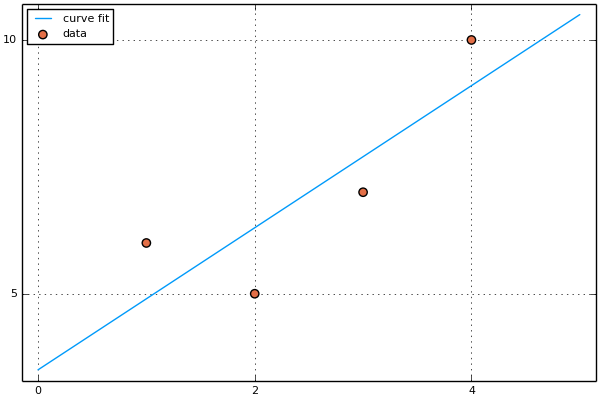

In [7]:
using Plots
pyplot() #choose plotting backend
input = [
    1 6
    2 5
    3 7
    4 10]
X = hcat(ones(size(input)[1]),input[:,1])
y = input[:,2]
betaHat = (X' * X ) \ X' * y #backslash computes LS-solution as in Matlab
print(betaHat)
plot(x->betaHat[2]*x + betaHat[1],0,5,label="curve fit")
scatter!(input[:,1],input[:,2],label="data")

#### Normal equations

First, we can pose and solve the normal equations:

\begin{align}
A\mathbf{x} &= \mathbf{b}\\
A^* A \mathbf{x} &= A^* \mathbf{b}\\
\mathbf{x} &= (A^*A)^{-1}A^*\mathbf{b} = A^+ \mathbf{b}.
\end{align}

$A^+$ is called the _pseudoinverse_ of $A$.

##### Least squares via Normal equations:

1. Form the matrix $A^* A$ and the vector $A^*\mathbf{b}$.
- Compute the 'Cholesky factorization': $A^*A = R^*R$.
- Solve the lower-triangular system $R^*\mathbf{w} = A^*\mathbf{b}$ for $\mathbf{w}$.
- Solve the upper-triangular system $R\mathbf{x} = \mathbf{w}$ for $\mathbf{x}$.

Symmetry implies the computation of $A^*A$ requires only $mn^2$ flops (rather than $2mn^2$).   Step 2 requires $n^3/3$ flops.

> ** THEOREM. **  Least squares via normal equations has operation count $\sim mn^2+ \frac{n^3}{3}$ flops.

In [8]:
B = A'*A;  z = A'*b;
@show size(B);

size(B) = (4,4)


In [9]:
[c B\z]

4x2 Array{Float64,2}:
 -0.0261566    -0.0261566  
 -0.00908228   -0.00908228 
  0.000785734   0.000785734
 -7.74825e-6   -7.74825e-6 

#### QR Factorization

Second, we can use a thin QR factorization to express the range of $A$ orthonormally, and reduce to a triangular square system.

Using either Gram-Schmidt or Householder triangularization, one constructs $A = \hat{Q}\hat{R}$.  The orthogonal projector $P$ can be written as $\hat{Q}\hat{Q}^*$.  Therefore:

\begin{align}
A\mathbf{x} &= \mathbf{b}\\
\hat{Q}\hat{R} \mathbf{x} & = \mathbf{b} \\
\hat{R} \mathbf{x} &= \hat{Q}^* \mathbf{b}\\
\mathbf{x} &= \hat{R}^{-1} \hat{Q}^* \mathbf{b} = A^+ \mathbf{b}
\end{align}

##### Least squares via QR factorization

1. Compute the reduced QR factorization $A = \hat{Q}\hat{R}$.
- Compute the vector $\hat{Q}^*\mathbf{b}$.
- Solve the upper-triangular system $\hat{R}\mathbf{x} = \hat{Q}^*\mathbf{b}$ for $\mathbf{x}$.

The work for this algorithm is dominated by the cost of the $QR$ factorization.  If Householder reflectors are used for this step, we have: 

> ** THEOREM. ** Work for solving least squares via QR factorization is  $\sim 2mn^2 - \frac{2}{3}n^3$ flops.

In [10]:
(Q,R) = qr(A);  
z = Q'*b;
[c R\z]

4x2 Array{Float64,2}:
 -0.0261566    -0.0261566  
 -0.00908228   -0.00908228 
  0.000785734   0.000785734
 -7.74825e-6   -7.74825e-6 

#### SVD

And third, we can use the SVD to orthgonalize both the range and the domain, ultimately getting a diagonal square system.

Suppose $A=\hat{U}\hat{\Sigma}V^*$ is an SVD of $A$:

\begin{align}
A \mathbf{x} &= \mathbf{b} \\
\hat{U}\hat{\Sigma}V^* \mathbf{x} &= \mathbf{b} \\
\hat{U}\hat{\Sigma} V^* \mathbf{x} & = \hat{U}\hat{U}^* \mathbf{b}\\
\hat{\Sigma} V^* \mathbf{x} &= \hat{U}^* \mathbf{b}\\
\mathbf{x} &= V\hat{\Sigma}^{-1} \hat{U}^*\mathbf{b} = A^+ \mathbf{b}.
\end{align}

##### Least squares via SVD

1. Compute the reduced SVD $A = \hat{U}\hat{\Sigma}V^*$.
- Compute the vector $\hat{U}^*\mathbf{b}$.
- Solve the diagonal system $\hat{\Sigma}\mathbf{w} = \hat{U}^*\mathbf{b}$ for $\mathbf{w}$.
- Set $\mathbf{x} = V\mathbf{w}$.

The operation count for this algorithm is dominated by the computation of the SVD.   Which for $m>> n$ is approximately the same as the QR factorization, however for $m\approx n$ it is typically:

> ** THEOREM. ** The work for the least squares via SVD is $\sim 2mn^2 + 11n^3$ flops.

In [11]:
(U,s,V) = svd(A);  
z = U'*b;
[c V*(z./s)]

4x2 Array{Float64,2}:
 -0.0261566    -0.0261566  
 -0.00908228   -0.00908228 
  0.000785734   0.000785734
 -7.74825e-6   -7.74825e-6 

## Conditioning and stability

Given multiple algorithms to solve a given problem, how do we determine which to use in a given situation?  

There are several factors: algorithm _complexity_ or runtime, _parallelizability_, mathematical _conditioning_ and numerical  _stability_. 